# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# Autoreload modules
%load_ext autoreload
%autoreload 2

# Model class
from aHSM import HSMC

# Matplotlib 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})


In [2]:
model = HSMC()

# Question 1

We modified the HSM_Stefano class so that it now has a new function called "HF_on_HM_table" that takes as attribute vectors of values and plots a table with values of $H_F/H_M$ for every combination of the given values of $\sigma$ and $\alpha$.
One major addition to the class module is the definition of the total value of home production consumption so that is able to take different functional forms depending on the value of $\sigma$.

In [3]:
# Illustrates changes in optimal HF/HM for values of alpha & sigma
alpha_val=[0.25,0.50,0.75]
sigma_val=[0.5,1.0,1.5]
model.tableHFHM(alpha_val,sigma_val)



/Users/frederikke/Desktop/pro/projects-2023-frederikke_vigh/inauguralproject/aHSM.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederikke/Desktop/pro/projects-2023-frederikke_vigh/inauguralproject/aHSM.py:62: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederikke/Desktop/pro/projects-2023-frederikke_vigh/inauguralproject/aHSM.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


a|s    0.50  1.00  1.50  
0.25  0.545 0.308 0.214
0.50  1.000 1.000 1.000
0.75  1.833 3.250 4.667


We used a loop to running on the values $\sigma$ and $\alpha$ contained into two different vectors to return a new array containing the values of $H_F/H_M$ corresponding to each combination of $\sigma$ and $\alpha$ values.
The code is defined outside the class; no changes have been made at the class module beside expanding it to take different values of sigma.

Above is seen the changes in $H_F/H_M$ for different combinations of $\sigma$ and $\alpha$. Where $\alpha$ is the productivity of homeproduction of the female in the household, the male´s productivity is therfore 1-$\alpha$. So as $\alpha$ increases the amount of home production of the female increases relative to the male. Futhermore, $\sigma$ is the elasticity of substitution. So an increase in $\sigma$ result in the hours worked in home production become more elastic, which increases substitution. 

# Question 2:

<Figure size 640x480 with 0 Axes>

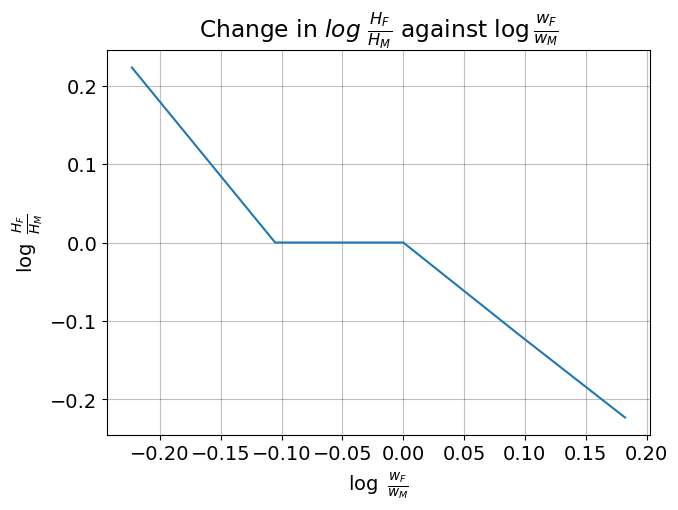

In [9]:
# Inserting the orginal values of alpha and sigma
model.par.sigma = 1
model.par.alpha = 0.5

# Calling the model
X, Y = model.solve_wF_vec(discrete=True)

# Plotting the figure 
plt.figure()
plt.figure(figsize=(7,5))

plt.plot(X, Y)
plt.title('Change in '+r'$log\ \frac{H_F}{H_M}$' + ' against ' + r'$\log \frac{w_F}{w_M}$')
plt.xlabel(r'$\log\ \frac{w_F}{w_M}$')
plt.ylabel(r'$\log\ \frac{H_F}{H_M}$')
plt.show()

In the figure above we see the relation between the females wage relative to the males wage plottet against the hours worked at home of the female against the hours worked at home of the male. Futhermore, $\alpha$ is set to 0.5 the female and male is therefore equal productive in home production. $\sigma$ is set to 1 and thereby are the work fully substitutable.
It is seen when the females wage is between 0.9-1.0 then they work an equal amount in home production.

# Question 3

<Figure size 640x480 with 0 Axes>

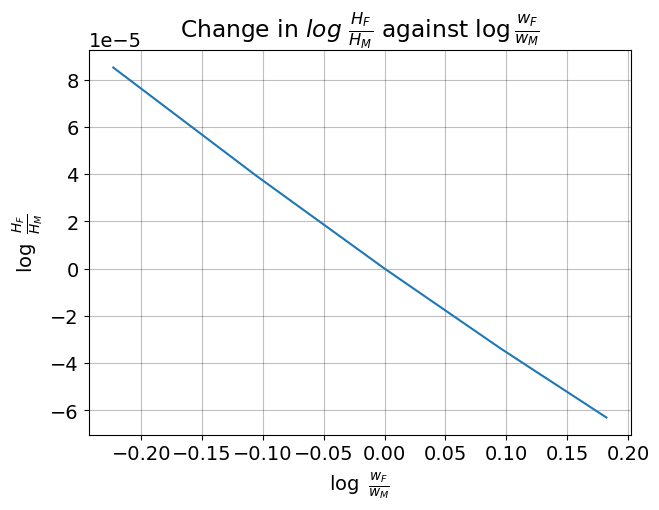

In [14]:
# Inserting the orginal values of alpha and sigma
model.par.sigma = 1
model.par.alpha = 0.5

# Calling the function
X, Y = model.solve_wF_vec(discrete=False)

# Plotting the figure
plt.figure()
plt.figure(figsize=(7,5))

plt.plot(X, Y)
plt.title('Change in '+r'$log\ \frac{H_F}{H_M}$' + ' against ' + r'$\log \frac{w_F}{w_M}$')
plt.xlabel(r'$\log\ \frac{w_F}{w_M}$')
plt.ylabel(r'$\log\ \frac{H_F}{H_M}$')
plt.show()

# Question 4

In [15]:
model.estimate()

alpha =  0.831879614467073
sigma =  0.08939081219694392


We get that the optimale values for alpha will be 0.8319 and for sigma = 0.0894 in order to minimize the function. The value of $\alpha$ suggest that the female is more productive in home production relative to the male. Futhermore, it is seen that the elasticity, sigma, is almost zero, which indicates a ineleasticy relation and therefore are not willing to substitut easily.